# Black Friday Data Set Analysis

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

#### Data Set Description
- Variable:	Definition
- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation (Masked)
- City_Category:	Category of the City (A,B,C)
- Stay_In_Current_City_Years:	Number of years stay in current city
- Marital_Status:	Marital Status
- Product_Category_1:	Product Category (Masked)
- Product_Category_2:	Product may belongs to other category also (Masked)
- Product_Category_3:	Product may belongs to other category also (Masked)
- Purchase:	Purchase Amount (Target Variable)

## Data Loading

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('/home/vinay/Downloads/Black Friday/train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
test=pd.read_csv('/home/vinay/Downloads/Black Friday/test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

## Data Dictionary

In [6]:
traindict=pd.DataFrame(train.dtypes)
traindict['MissingValues']=train.isnull().sum()
traindict['UniqueValues']=train.nunique()
traindict['Count']=train.count()
traindict=traindict.rename(columns={0:'DataType'})
traindict

,DataType,MissingValues,UniqueValues,Count
User_ID,int64,0,5891,550068
Product_ID,object,0,3631,550068
Gender,object,0,2,550068
Age,object,0,7,550068
Occupation,int64,0,21,550068
City_Category,object,0,3,550068
Stay_In_Current_City_Years,object,0,5,550068
Marital_Status,int64,0,2,550068
Product_Category_1,int64,0,20,550068
Product_Category_2,float64,173638,17,376430


In [7]:
testdict=pd.DataFrame(test.dtypes)
testdict['MissingValues']=test.isnull().sum()
testdict['UniqueValues']=test.nunique()
testdict['Count']=test.count()
testdict=testdict.rename(columns={0:'DataType'})
testdict

,DataType,MissingValues,UniqueValues,Count
User_ID,int64,0,5891,233599
Product_ID,object,0,3491,233599
Gender,object,0,2,233599
Age,object,0,7,233599
Occupation,int64,0,21,233599
City_Category,object,0,3,233599
Stay_In_Current_City_Years,object,0,5,233599
Marital_Status,int64,0,2,233599
Product_Category_1,int64,0,18,233599
Product_Category_2,float64,72344,17,161255


## Descriptive Statistics

In [8]:
train.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [9]:
train.describe(include=['number'])

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
test.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,233599,233599,233599,233599,233599
unique,3491,2,7,3,5
top,P00265242,M,26-35,B,1
freq,829,175772,93428,98566,82604


In [11]:
test.describe(include=['number'])

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


## Correlation Matrix

In [12]:
train.columns
colNames=['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years',
     'Marital_Status', 'Product_Category_1',
     'Product_Category_2', 'Product_Category_3']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff75e0b8c18>,
      dtype=object)

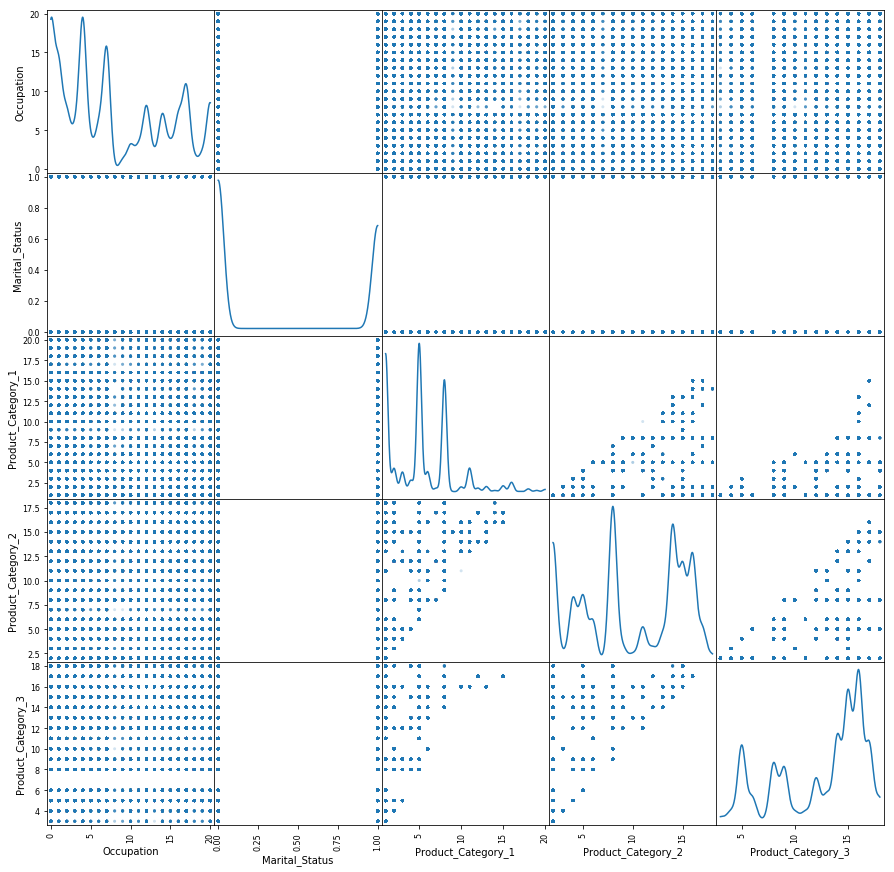

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(train[colNames[:]],alpha=0.2,figsize=(15,15),diagonal='kde')

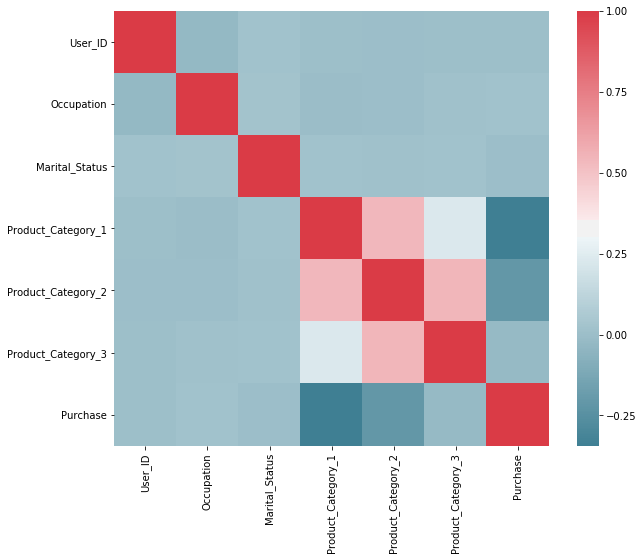

In [15]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

From above correlation matrix, it can be inferred that there is no correlation between any variable. 

Some +ve correlation exists between:-
- Product_Category_1 and Product_Category_2 
- Product_Category_2 and Product_Category_3.

Some -ve correlation exists between:-
- Product_Category_1 and Purchase

Replacing the missing values in 'Product_Category_2' and 'Product_Category_3' with <b>zero</b>.

In [16]:
train.Product_Category_2.fillna(0,inplace=True)
train.Product_Category_3.fillna(0,inplace=True)

In [17]:
test.Product_Category_2.fillna(0,inplace=True)
test.Product_Category_3.fillna(0,inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

#### Gender, City_Category, Marital_Status, Stay_In_Current_City_Years (independent variables)

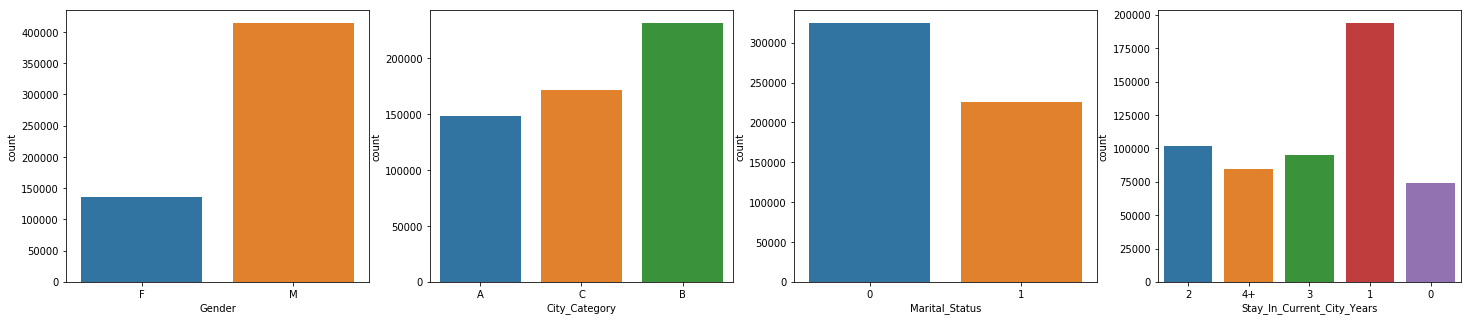

In [18]:
fig,axes=plt.subplots(1,4,figsize=(25,5))
sns.countplot('Gender',data=train,ax=axes[0])
sns.countplot('City_Category',data=train,ax=axes[1])
sns.countplot('Marital_Status',data=train,ax=axes[2])
sns.countplot('Stay_In_Current_City_Years',data=train,ax=axes[3])

According to the data set:

- Male customers are appx. three times the number of female customers.
- Most customers visiting the shop are from City B and the least are from City A.
- Majority of customers are non married.
- The number of customers who have stayed in the city for 1 year are significantly higher than all other categories. People who are new to the city are the least number of customers coming to the shop.

#### Age (independent variable)

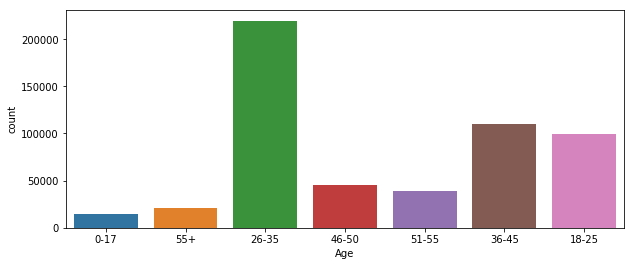

In [19]:
plt.figure(figsize=(10,4))
sns.countplot('Age',data=train)

- Number of people of age group 26-35 are significantly higher than every other age group. Perhaps because this age group is the age group where people are likely to spend much because of either their spouse or family reasons, or because they are working and hence, more likely to spend money on parties, work related stuff, groceries and other necessities. 
- People of age group 0-17 are the customers who shop the least
- It can be seen that number of customers rise from least to greatest upto age group of 26-35 and then decrease until age group of 55+, in a chronological sequence.

#### Occupation (independent variable)

The following graph shows the distribution of the number of customers of a particular occupation level who buy products from the shop.

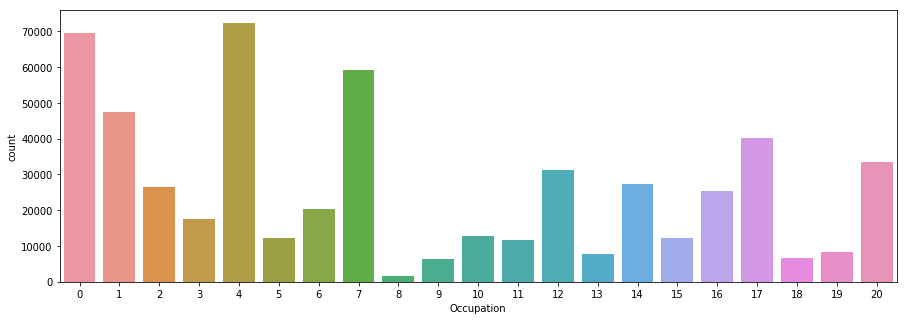

In [20]:
plt.figure(figsize=(15,5))
sns.countplot('Occupation',data=train)

It can be inferred that the majority of number of customers belong to low level occupation (0 to 10) whereas the customers with high occupation levels (11 to 20), they do not purchase things from the the store as frequently as the people with low occupation levels.

#### Product_Category_1, Product_Category_2, Product_Category_3 (independent variables)

The 3 figures below visualize the product category 1,2,3 distribution according to their frequency.

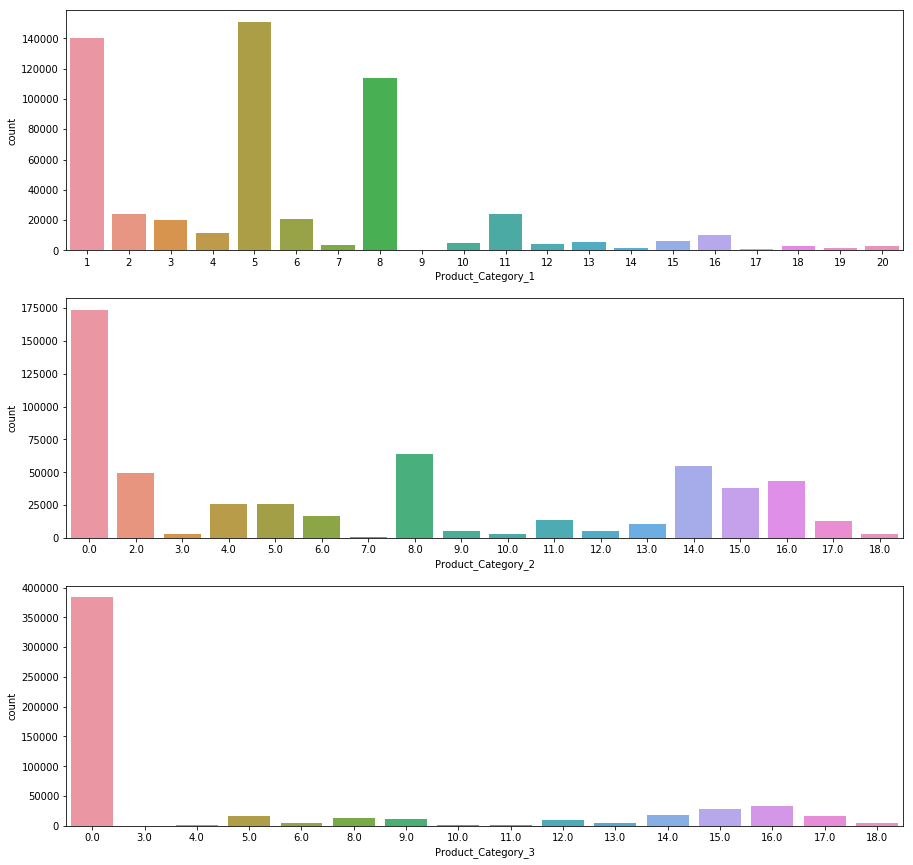

In [21]:
fig,axes=plt.subplots(3,1,figsize=(15,15))
sns.countplot('Product_Category_1',data=train,ax=axes[0])
sns.countplot('Product_Category_2',data=train,ax=axes[1])
sns.countplot('Product_Category_3',data=train,ax=axes[2])

Most of the purchased goods belong to Product_Category_1 (1,5,8). The least purchased products are from Product_Category_3.

#### Purchase (dependent variable)

The following graph visualizes the distribution of purchase values.

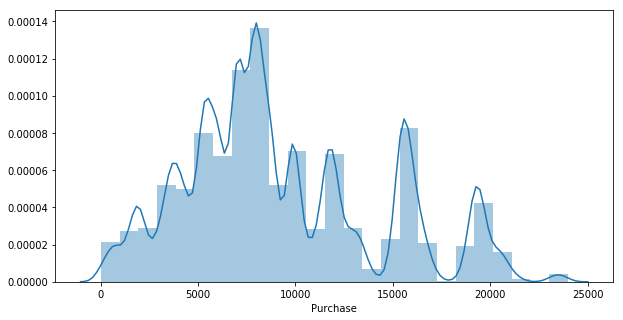

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(train['Purchase'],bins=25)

- It can be inferred that most of the puchase values range from 5K to 10K money units.
- The number of purchase values higher than 10K money units is not so high. Frequency of purchase values between 20K to 25K is the lowest. 
- This fact can be corroborated with the 'Occupation' variable distribution which shows that most of the people who shop are from low level occupation and hence are more likely to spend in the above mentioned range i.e. 0 to 10K. 
- As the number of people who have high occupation level are not as much as their counterpart, therefore the frequency of purchase values > 10K is less.

### Bivariate Analysis

- First figure is for average values
- Second figure is for total values

#### Gender and Purchase

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


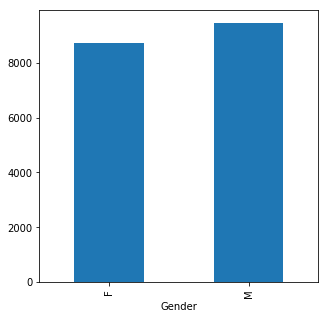

In [23]:
print(train.groupby('Gender')['Purchase'].mean())
train.groupby('Gender')['Purchase'].mean().plot(kind='bar',figsize=(5,5))

The average that every woman spends is about 1K less than that of a man.

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


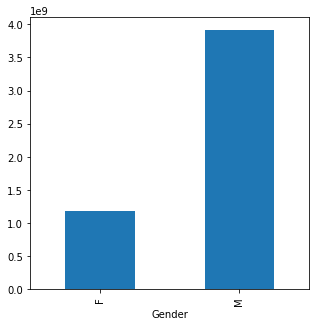

In [24]:
print(train.groupby('Gender')['Purchase'].sum())
train.groupby('Gender')['Purchase'].sum().plot(kind='bar',figsize=(5,5))

Total female purchase is like one third of that of a male.

#### Age and Purchase

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


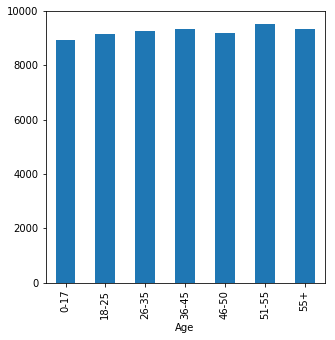

In [25]:
print(train.groupby('Age')['Purchase'].mean())
train.groupby('Age')['Purchase'].mean().plot(kind='bar',figsize=(5,5))

- Average purchase values of all the age groups are more or less the same. They do not differ significantly.
- However, age group 0-17 have the least average and 51-55 have the highest average.

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64


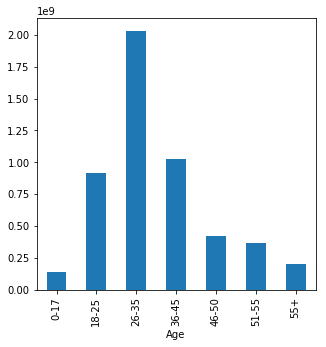

In [26]:
print(train.groupby('Age')['Purchase'].sum())
train.groupby('Age')['Purchase'].sum().plot(kind='bar',figsize=(5,5))

- As said before, in a chronological sequence, with the increase in age group category, total sales experienced increases until the age group 26-35 and then it decreases.
- Also, the age group of 26-35 make up for the highest sales. Not only that, there sales is nearly double the sales of the second highest sales of the age group 36-45.

#### Occupation and Purchase

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64


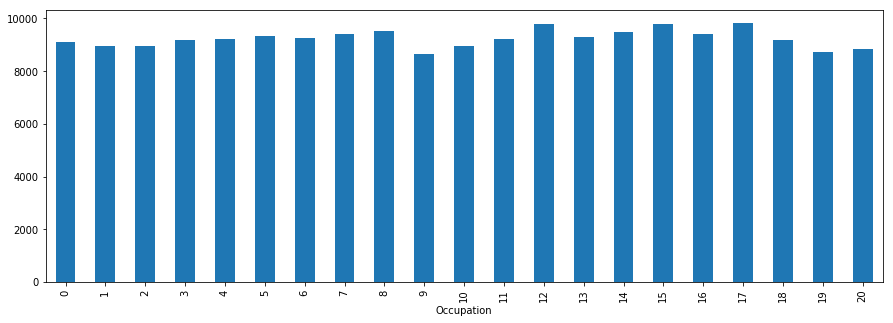

In [27]:
print(train.groupby('Occupation')['Purchase'].mean())
train.groupby('Occupation')['Purchase'].mean().plot(kind='bar',figsize=(15,5))

There is no significant difference between the average sales of customers by their occupation levels.

Occupation
0     635406958
1     424614144
2     238028583
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
20    296570442
Name: Purchase, dtype: int64


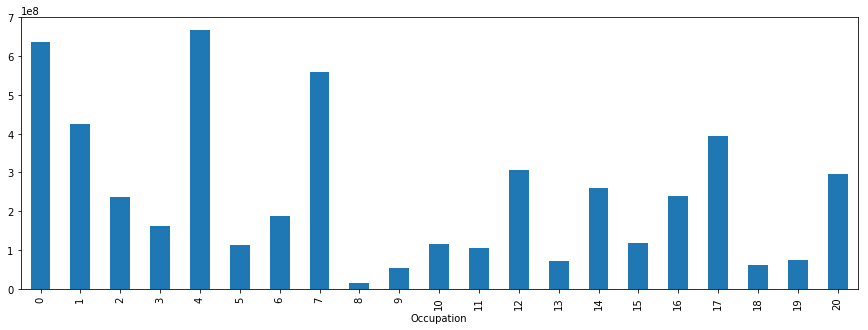

In [28]:
print(train.groupby('Occupation')['Purchase'].sum())
train.groupby('Occupation')['Purchase'].sum().plot(kind='bar',figsize=(15,5))

- It can be seen that customer with high occupation levels, i.e. whose income must be very high, do not have the highest sales. Perhaps it must be because customers with high occupation levels are very few and therefore, do not represent the highest purchase. (total purchase value = number of customers of occupation level 'l' * respective purchased product)
- On the contrary, people with low occuaption levels, i.e. whose income must be low, do have the highest sales (some, not every category). Perhaps this predicament can be explained by the fact that although their income must be very low, but the number of people belonging to those occupation levels are extremely high and therefore account for the highest sales.

#### City_Category and Purchase

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


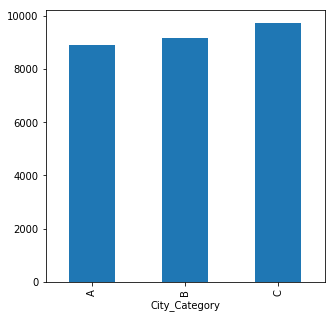

In [29]:
print(train.groupby('City_Category')['Purchase'].mean())
train.groupby('City_Category')['Purchase'].mean().plot(kind='bar',figsize=(5,5))

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64


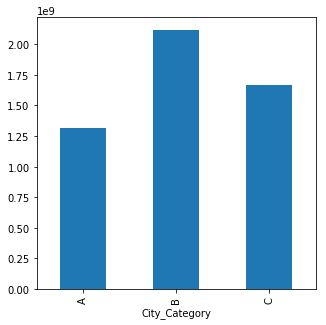

In [30]:
print(train.groupby('City_Category')['Purchase'].sum())
train.groupby('City_Category')['Purchase'].sum().plot(kind='bar',figsize=(5,5))

- The highest purchase is from the City B.
- The least purchase is from the City A.

#### Stay_In_Current_City_Years and Purchase

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64


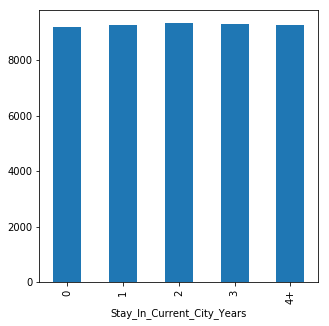

In [31]:
print(train.groupby('Stay_In_Current_City_Years')['Purchase'].mean())
train.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar',figsize=(5,5))

Stay_In_Current_City_Years
0      682979229
1     1792872533
2      949173931
3      884902659
4+     785884390
Name: Purchase, dtype: int64


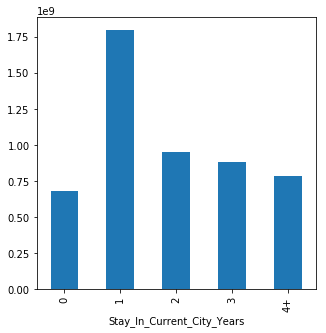

In [32]:
print(train.groupby('Stay_In_Current_City_Years')['Purchase'].sum())
train.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='bar',figsize=(5,5))

- Customers with stay=1 have the highest purchase
- Customers with stay=0 have the lowest purchase

#### Marital_Status and Purchase

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


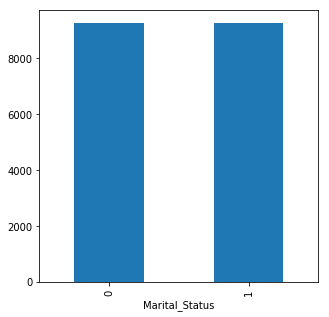

In [33]:
print(train.groupby('Marital_Status')['Purchase'].mean())
train.groupby('Marital_Status')['Purchase'].mean().plot(kind='bar',figsize=(5,5))

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64


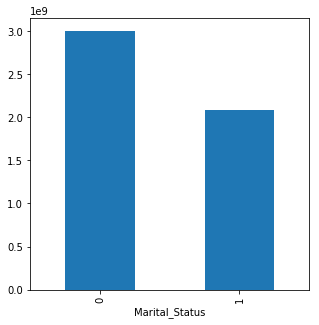

In [34]:
print(train.groupby('Marital_Status')['Purchase'].sum())
train.groupby('Marital_Status')['Purchase'].sum().plot(kind='bar',figsize=(5,5))

- Non married represent the highest purchase

#### Product_Category_1 and Purchase

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64


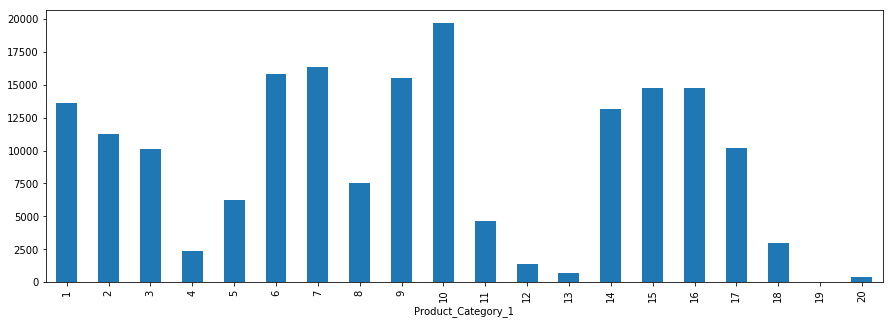

In [35]:
print(train.groupby('Product_Category_1')['Purchase'].mean())
train.groupby('Product_Category_1')['Purchase'].mean().plot(kind='bar',figsize=(15,5))

Product_Category_1
1     1910013754
2      268516186
3      204084713
4       27380488
5      941835229
6      324150302
7       60896731
8      854318799
9        6370324
10     100837301
11     113791115
12       5331844
13       4008601
14      20014696
15      92969042
16     145120612
17       5878699
18       9290201
19         59378
20        944727
Name: Purchase, dtype: int64


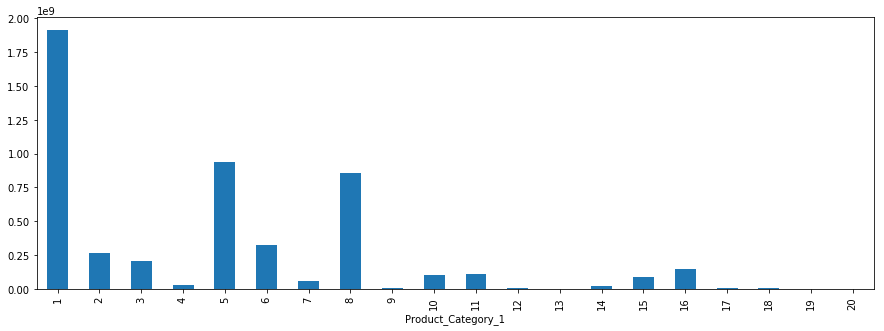

In [36]:
print(train.groupby('Product_Category_1')['Purchase'].sum())
train.groupby('Product_Category_1')['Purchase'].sum().plot(kind='bar',figsize=(15,5))

#### Product_Category_2 and Purchase

Product_Category_2
0.0      7518.695389
2.0     13619.356401
3.0     11235.359570
4.0     10215.192001
5.0      9027.821574
6.0     11503.551379
7.0      6884.683706
8.0     10273.259518
9.0      7277.006851
10.0    15648.729543
11.0     8940.580515
12.0     6975.472504
13.0     9683.352388
14.0     7105.264916
15.0    10357.077691
16.0    10295.681933
17.0     9421.576577
18.0     9352.440433
Name: Purchase, dtype: float64


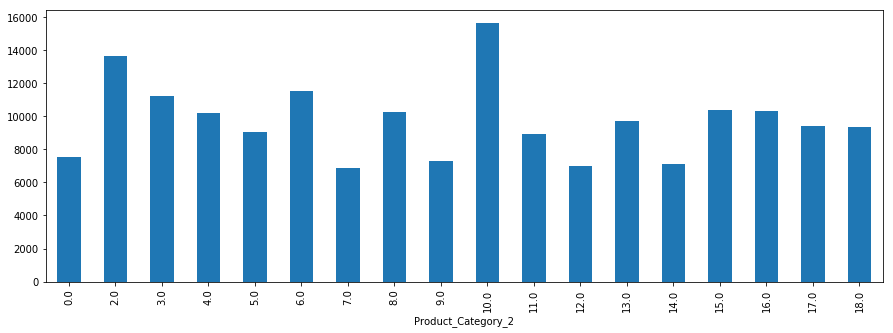

In [37]:
print(train.groupby('Product_Category_2')['Purchase'].mean())
train.groupby('Product_Category_2')['Purchase'].mean().plot(kind='bar',figsize=(15,5))

Product_Category_2
0.0     1305531230
2.0      670303864
3.0       32402777
4.0      262295485
5.0      236844899
6.0      189417477
7.0        4309812
8.0      658392656
9.0       41428000
10.0      47619084
11.0     126366165
12.0      38560412
13.0     101975384
14.0     391556939
15.0     392067176
16.0     445339722
17.0     125495400
18.0      25906260
Name: Purchase, dtype: int64


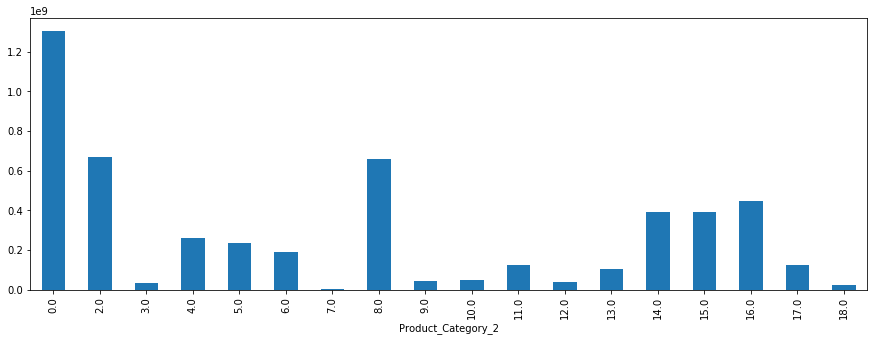

In [38]:
print(train.groupby('Product_Category_2')['Purchase'].sum())
train.groupby('Product_Category_2')['Purchase'].sum().plot(kind='bar',figsize=(15,5))

#### Product_Category_3 and Purchase

Product_Category_3
0.0      8221.836943
3.0     13939.696574
4.0      9794.386667
5.0     12117.786889
6.0     13194.311043
8.0     13024.918882
9.0     10431.697210
10.0    13505.813441
11.0    12091.437673
12.0     8715.512762
13.0    13185.118703
14.0    10052.594530
15.0    12339.369900
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
Name: Purchase, dtype: float64


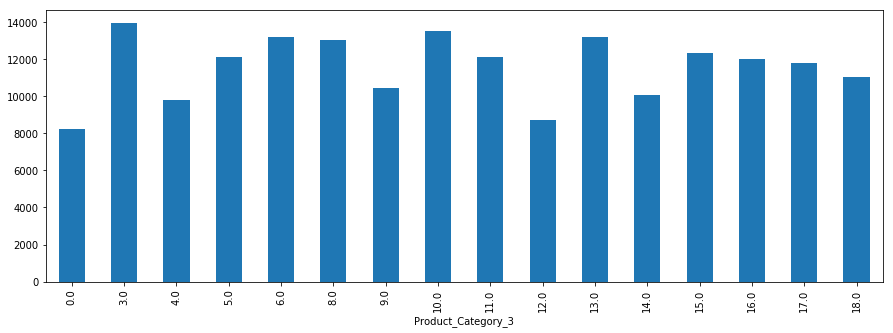

In [39]:
print(train.groupby('Product_Category_3')['Purchase'].mean())
train.groupby('Product_Category_3')['Purchase'].mean().plot(kind='bar',figsize=(15,5))

Product_Category_3
0.0     3150994343
3.0        8545034
4.0       18364475
5.0      201858094
6.0       64520181
8.0      163619031
9.0      120788622
10.0      23311034
11.0      21825045
12.0      80583631
13.0      71977563
14.0     185249212
15.0     345662769
16.0     391040983
17.0     196581588
18.0      50891137
Name: Purchase, dtype: int64


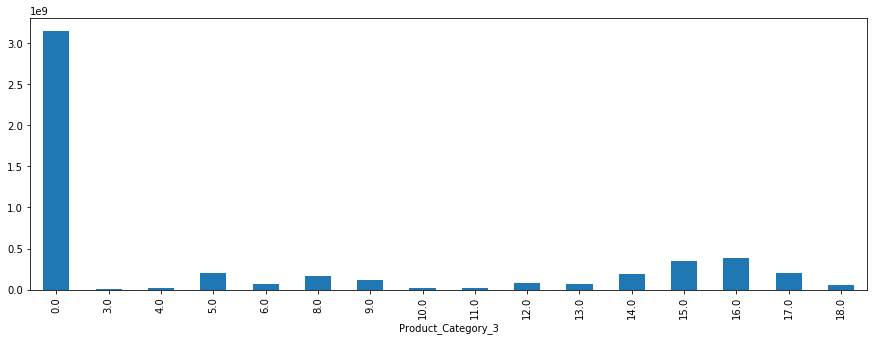

In [40]:
print(train.groupby('Product_Category_3')['Purchase'].sum())
train.groupby('Product_Category_3')['Purchase'].sum().plot(kind='bar',figsize=(15,5))

In [41]:
#train.groupby('Age')['Gender'].value_counts().unstack()

In [42]:
#train.groupby('Age')['Gender'].value_counts().plot(kind='bar')

In [43]:
#train.groupby('Gender')['Age'].value_counts().plot(kind='bar')

In [44]:
#train.groupby('Gender')['Occupation'].value_counts().unstack()

In [45]:
#plt.figure(figsize=(10,5))
#train.groupby('Occupation')['Gender'].value_counts().plot(kind='bar')

In [46]:
#plt.figure(figsize=(10,5))
#train.groupby('Gender')['Occupation'].value_counts().plot(kind='bar')

In [47]:
#train.groupby('Gender')['City_Category'].value_counts().unstack()

In [48]:
#train.groupby('City_Category')['Gender'].value_counts().plot(kind='bar')

In [49]:
#train.groupby('Gender')['City_Category'].value_counts().plot(kind='bar')

In [50]:
#train.groupby('Gender')['Marital_Status'].value_counts().unstack()

In [51]:
#train.groupby('Marital_Status')['Gender'].value_counts().plot(kind='bar')

In [52]:
#train.groupby('Gender')['Marital_Status'].value_counts().plot(kind='bar')

In [53]:
#train.groupby('Age')['Occupation'].value_counts().unstack()

In [54]:
#plt.figure(figsize=(20,35))
#train.groupby('Age')['Occupation'].value_counts().plot(kind='barh')

In [55]:
#plt.figure(figsize=(20,35))
#train.groupby('Occupation')['Age'].value_counts().plot(kind='barh')

In [56]:
#train.groupby('Age')['City_Category'].value_counts().unstack()

In [57]:
#train.groupby('Age')['City_Category'].value_counts().plot(kind='bar')

In [58]:
#train.groupby('City_Category')['Age'].value_counts().plot(kind='bar')

In [59]:
#train.groupby('Age')['Marital_Status'].value_counts().unstack()

In [60]:
#train.groupby('Age')['Marital_Status'].value_counts().plot(kind='bar')

In [61]:
#train.groupby('Marital_Status')['Age'].value_counts().plot(kind='bar')

In [62]:
#train.groupby('Marital_Status')['Occupation'].value_counts().unstack()

In [63]:
#plt.figure(figsize=(10,5))
#train.groupby('Marital_Status')['Occupation'].value_counts().plot(kind='bar')

In [64]:
#plt.figure(figsize=(10,5))
#train.groupby('Occupation')['Marital_Status'].value_counts().plot(kind='bar')

In [65]:
#train.groupby('Marital_Status')['City_Category'].value_counts().unstack()

In [66]:
#train.groupby('City_Category')['Marital_Status'].value_counts().plot(kind='bar')

In [67]:
#train.groupby('Marital_Status')['City_Category'].value_counts().plot(kind='bar')

In [68]:
#train.groupby('Stay_In_Current_City_Years')['Gender'].value_counts().unstack()

In [69]:
#train.groupby('Stay_In_Current_City_Years')['Gender'].value_counts().plot(kind='bar')

In [70]:
#train.groupby('Gender')['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

In [71]:
#train.groupby('Stay_In_Current_City_Years')['Age'].value_counts().unstack()

In [72]:
#plt.figure(figsize=(10,10))
#train.groupby('Stay_In_Current_City_Years')['Age'].value_counts().plot(kind='barh')

In [73]:
#plt.figure(figsize=(10,10))
#train.groupby('Age')['Stay_In_Current_City_Years'].value_counts().plot(kind='barh')

In [74]:
#train.groupby('Stay_In_Current_City_Years')['Occupation'].value_counts().unstack()

In [75]:
#plt.figure(figsize=(20,35))
#train.groupby('Stay_In_Current_City_Years')['Occupation'].value_counts().plot(kind='barh')

In [76]:
#plt.figure(figsize=(20,35))
#train.groupby('Occupation')['Stay_In_Current_City_Years'].value_counts().plot(kind='barh')

In [77]:
#train.groupby('City_Category')['Stay_In_Current_City_Years'].value_counts().unstack()

In [78]:
#train.groupby('City_Category')['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

In [79]:
#train.groupby('Stay_In_Current_City_Years')['City_Category'].value_counts().plot(kind='bar')

In [80]:
#train.groupby('Marital_Status')['Stay_In_Current_City_Years'].value_counts().unstack()

In [81]:
#train.groupby('Marital_Status')['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

In [82]:
#train.groupby('Stay_In_Current_City_Years')['Marital_Status'].value_counts().plot(kind='bar')

### Feature Engineering

- Map Female to 0 and Male to 1 in Gender variable
- Replace 4+ with 4 in Stay_In_Current_City_Years variable
- Create dummy variables or Age and City_category variables

In [83]:
genderMap={'F':0,'M':1}
train['Gender']=train['Gender'].map(genderMap)
test['Gender']=test['Gender'].map(genderMap)
train['Gender'].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

In [84]:
def correctFunc(word):
    if word == '4+':
        word=4
    return int(word)
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].apply(correctFunc)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].apply(correctFunc)
print(train['Stay_In_Current_City_Years'].unique())

[2 4 3 1 0]


In [85]:
dummies=['Age','City_Category']
for d in dummies:
    ohe = pd.get_dummies(train[d])
    train = train.drop(d,axis = 1)
    train = train.join(ohe)
    ohe1 = pd.get_dummies(test[d])
    test = test.drop(d,axis = 1)
    test = test.join(ohe1)

In [86]:
train.head()

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C
0,1000001,P00069042,0,10,2,0,3,0.0,0.0,8370,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0,10,2,0,1,6.0,14.0,15200,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0,10,2,0,12,0.0,0.0,1422,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0,10,2,0,12,14.0,0.0,1057,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,1,16,4,0,8,0.0,0.0,7969,0,0,0,0,0,0,1,0,0,1


In [87]:
test.head()

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C
0,1000004,P00128942,1,7,2,1,1,11.0,0.0,0,0,0,0,1,0,0,0,1,0
1,1000009,P00113442,1,17,0,0,3,5.0,0.0,0,0,1,0,0,0,0,0,0,1
2,1000010,P00288442,0,1,4,1,5,14.0,0.0,0,0,0,1,0,0,0,0,1,0
3,1000010,P00145342,0,1,4,1,4,9.0,0.0,0,0,0,1,0,0,0,0,1,0
4,1000011,P00053842,0,1,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,0,1


In [88]:
train.shape

(550068, 20)

In [89]:
test.shape

(233599, 19)

In [90]:
train = train[['User_ID', 'Product_ID', 'Gender', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', '0-17', '18-25',
       '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C','Purchase']]

In [91]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', '0-17', '18-25', '26-35',
       '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', 'Purchase'],
      dtype='object')

In [92]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', '0-17', '18-25', '26-35',
       '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C'],
      dtype='object')

### Model Building

Create train and test sets for training the machine learning model

In [93]:
x_train=train.drop(['User_ID', 'Product_ID'],axis=1).iloc[:,:-1].values
y_train=train.drop(['User_ID', 'Product_ID'],axis=1).iloc[:,-1].values

In [94]:
x_test=test.drop(['User_ID', 'Product_ID'],axis=1).iloc[:,:].values

#### Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_test)

In [96]:
d={'User_ID':test['User_ID'],'Product_ID':test['Product_ID'],'Purchase':y_pred_lr}
answerLR=pd.DataFrame(data=d)
answerLR=answerLR.set_index(['User_ID'])
answerLR.to_csv('BF1.csv')
print(answerLR.head())

        Product_ID  Purchase
User_ID                     
1000004  P00128942  10307.50
1000009  P00113442  10076.00
1000010  P00288442   8497.50
1000010  P00145342   8783.75
1000011  P00053842  10902.75


In [ ]:
#from sklearn.svm import SVR
#svr = SVR(kernel = 'linear')
#svr.fit(x_train, y_train)

#y_pred_svr=svr.predict(x_test)

In [ ]:
#answerSVR=pd.DataFrame(data=d)
#answerSVR=answerSVR.set_index(['User_ID'])
#answerSVR.to_csv('BF2.csv')
#print(answerSVR.head())

#### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train, y_train)

# Predicting a new result
y_pred_dtr = dtr.predict(x_test)

In [22]:
d={'User_ID':test['User_ID'],'Product_ID':test['Product_ID'],'Purchase':y_pred_dtr}
answerDTR=pd.DataFrame(data=d)
answerDTR=answerDTR.set_index(['User_ID'])
answerDTR.to_csv('BF3.csv')
print(answerDTR.head())

        Product_ID      Purchase
User_ID                         
1000004  P00128942  19576.000000
1000009  P00113442  10677.000000
1000010  P00288442   8357.222222
1000010  P00145342   2056.000000
1000011  P00053842   2743.000000


#### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

# Predicting a new result
y_pred_rf = rf.predict(x_test)

In [24]:
answerRF=pd.DataFrame(data=d)
answerRF=answerRF.set_index(['User_ID'])
answerRF.to_csv('BF4.csv')
print(answerRF.head())

        Product_ID      Purchase
User_ID                         
1000004  P00128942  19576.000000
1000009  P00113442  10677.000000
1000010  P00288442   8357.222222
1000010  P00145342   2056.000000
1000011  P00053842   2743.000000


#### XGBoost 

In [27]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb.fit(x_train, y_train, verbose=False)

y_pred_xg = xgb.predict(x_test)

In [29]:
answerXGB=pd.DataFrame(data=d)
answerXGB=answerXGB.set_index(['User_ID'])
answerXGB.to_csv('BF5.csv')
print(answerXGB.head())

        Product_ID      Purchase
User_ID                         
1000004  P00128942  19576.000000
1000009  P00113442  10677.000000
1000010  P00288442   8357.222222
1000010  P00145342   2056.000000
1000011  P00053842   2743.000000


#### CatBoost

In [28]:
trainNew=pd.read_csv('/home/vinay/Downloads/Black Friday/train.csv')
testNew=pd.read_csv('/home/vinay/Downloads/Black Friday/test.csv')

In [30]:
x_trainNew=trainNew.drop(['User_ID', 'Product_ID'],axis=1).iloc[:,:-1].values
y_trainNew=trainNew.drop(['User_ID', 'Product_ID'],axis=1).iloc[:,-1].values

In [31]:
x_testNew=testNew.drop(['User_ID', 'Product_ID'],axis=1).iloc[:,:].values

In [36]:
from catboost import CatBoostRegressor
cate_features = np.where(trainNew.drop(['User_ID', 'Product_ID'],axis=1).dtypes == object)[0]
#print(cate_features)
cat_classifier_model=CatBoostRegressor(iterations=100, learning_rate=1, depth=2,random_seed=0)
cat_classifier_model.fit(x_trainNew, y_trainNew, cat_features=cate_features)

y_pred_categorical=cat_classifier_model.predict(x_testNew)

0:	learn: 4193.9328049	total: 167ms	remaining: 16.5s
1:	learn: 3968.0450462	total: 277ms	remaining: 13.6s
2:	learn: 3700.3767646	total: 405ms	remaining: 13.1s
3:	learn: 3571.1019783	total: 511ms	remaining: 12.3s
4:	learn: 3247.6010574	total: 614ms	remaining: 11.7s
5:	learn: 3165.6453820	total: 730ms	remaining: 11.4s
6:	learn: 3113.7243640	total: 834ms	remaining: 11.1s
7:	learn: 3081.7670148	total: 940ms	remaining: 10.8s
8:	learn: 3069.4085440	total: 1.04s	remaining: 10.5s
9:	learn: 3062.7037038	total: 1.15s	remaining: 10.3s
10:	learn: 3043.6430970	total: 1.23s	remaining: 9.93s
11:	learn: 3038.9111998	total: 1.34s	remaining: 9.84s
12:	learn: 3023.9159927	total: 1.44s	remaining: 9.65s
13:	learn: 3020.0705132	total: 1.54s	remaining: 9.44s
14:	learn: 3016.0932666	total: 1.66s	remaining: 9.39s
15:	learn: 3014.4490875	total: 1.75s	remaining: 9.19s
16:	learn: 3012.2212981	total: 1.85s	remaining: 9.02s
17:	learn: 3011.1214074	total: 1.97s	remaining: 8.97s
18:	learn: 3007.1718114	total: 2.07s	r

In [37]:
answerCB=pd.DataFrame(data=d)
answerCB=answerCB.set_index(['User_ID'])
answerCB.to_csv('BF6.csv')
print(answerCB.head())

        Product_ID      Purchase
User_ID                         
1000004  P00128942  19576.000000
1000009  P00113442  10677.000000
1000010  P00288442   8357.222222
1000010  P00145342   2056.000000
1000011  P00053842   2743.000000


### Result

The Linear Regression model performed the worst whereas all the other models performed on the same level i.e. their rmse scores on submission were the same (3284.67).